<a href="https://colab.research.google.com/github/VSCHY/RiverNetwork/blob/master/Toy_Model_linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> Description of the toy model </h1>
<hr>

<center>

<img src="linear_scheme.png" width="200"/>
![image](https://raw.githubusercontent.com/VSCHY/RiverNetwork/master/linear_scheme.png)

<em>Figure 1: Description of the HTUs toy model in series </em>
</center>

River dynamic Parameter : 
*   tcst : time constant of the reservoir
*   topoindex

In this model we consider a basic time unit = 1. Then the subdivision of the time unit are defined by subdt. For exemple, subdt = 2 corresponds to two time step inside the basic unit, i.e. a time step of 0.5.

Time parameters :
*   niter : number of iteration
*   subdt : number of subdivision of 1 time unit

Formula to define the discharge out of i : 

Qi = 1/(tcst*topoindex)*Vi * dt

The outflow discharge is Qout = Qnhtus

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class experiment:
  def __init__(self, D, V= None, Qin = 0):
    """
    D : Initialization of the parameters values from the dictionnary
    V : Array with the initial state of the different reservoir (possible to describe as a list)
    Qin : inflow in the first reservoi
    """
    self.tcst = D["tcst"]
    self.topoindex = D["topoindex"]
    self.nhtus = D["nhtus"]
    # 
    self.subdt =D["subdt"]
    # subdt describe the time step, it is the number of division of the basic time step   
    self.dt = 1/self.subdt
    # 
    self.niter = D["niter"] 
    self.f_cst = 1/(self.tcst * self.topoindex)
    self.init_var()
    if V is not None:
        self.V[:] = V
    self.Qin = Qin

  def init_var(self):
    """
    Initialization of volume and discharge for each reservoir
    """
    self.V = np.zeros((self.nhtus))
    self.Q = np.zeros((self.nhtus))  
  
  def launch(self):
     """
     Run the experiment, the output are the mean discharge over each basic unit of time
     and for each iteration
     """
     hist_out = np.zeros(self.subdt*self.niter)
     for it in range(self.niter):
        for t in range(self.subdt):
          self.Q = self.V*self.f_cst*self.dt
          self.V = self.V-self.Q
          hist_out[it * self.subdt + t] = self.Q[-1]
          self.V[1:] += self.Q[:-1]
          self.V[0] += self.Qin
     # Mean de subdt sur les subdt
     hist_out = np.mean(np.reshape(hist_out, (-1,self.subdt)), axis = 1)
     return hist_out

####

def get_param(tcst = 0.1, topoindex = 300, nhtus = 1, subdt = 1, niter = 1000):
    """
    Function to define the Dictionnary parameters.
    This is simplified by using default values.
    """
    D = {"tcst": tcst, "topoindex":topoindex, "nhtus" :nhtus, "subdt":subdt,  "niter":niter}
    return D

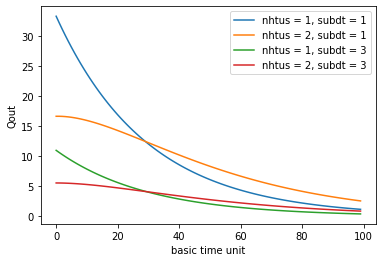

In [2]:
# Experiment 1 
"""
First experiment to explore the model
explore different nhtus and different subdt with the first intuition of adjusting the volume to the number of HTUs
"""
Lout = []; Lname = []

exp0 = experiment(get_param(), [1000])
Lout.append(exp0.launch()); Lname.append("nhtus = 1, subdt = 1")

exp0 = experiment(get_param(nhtus = 2), [500, 500])
Lout.append(exp0.launch()); Lname.append("nhtus = 2, subdt = 1")

exp0 = experiment(get_param(subdt = 3), [1000])
Lout.append(exp0.launch()); Lname.append("nhtus = 1, subdt = 3")

exp0 = experiment(get_param(subdt = 3, nhtus = 2), [500, 500])
Lout.append(exp0.launch()); Lname.append("nhtus = 2, subdt = 3")

for out, name, color in zip(Lout,Lname, ["k", "b", "r", "g"]):
  plt.plot(out[:100], label = name)
  plt.ylabel("Qout")
  plt.xlabel("basic time unit")
  plt.legend()


<h3> Conclusion </h3>
The volume has an important impact. The equal repartition of the same volume of water may not be the solution. 

nhtus = 1, subdt = 1 [30000.]
nhtus = 2, subdt = 1 [30000. 30000.]
nhtus = 1, subdt = 3 [90000.]
nhtus = 2, subdt = 3 [90000.         89999.99999999]


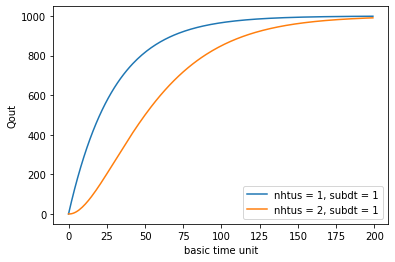

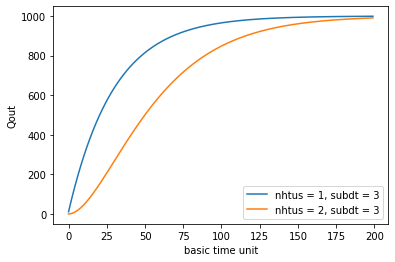

In [3]:
# Experiment 2
"""
Force the first HTU with a Qin = 1000 and see the content of water of the HTUs at equilibrium
"""
Lout = []; Lname = []

exp0 = experiment(get_param(), [0], Qin = 1000)
Lout.append(exp0.launch()); Lname.append("nhtus = 1, subdt = 1")
print("nhtus = 1, subdt = 1", exp0.V)

exp0 = experiment(get_param(nhtus = 2), [0, 0], Qin = 1000)
Lout.append(exp0.launch()); Lname.append("nhtus = 2, subdt = 1")
print("nhtus = 2, subdt = 1", exp0.V)

exp0 = experiment(get_param(subdt = 3), [0], Qin = 1000)
Lout.append(exp0.launch()); Lname.append("nhtus = 1, subdt = 3")
print("nhtus = 1, subdt = 3", exp0.V)

exp0 = experiment(get_param(subdt = 3, nhtus = 2), [0, 0], Qin = 1000)
Lout.append(exp0.launch()); Lname.append("nhtus = 2, subdt = 3")
print("nhtus = 2, subdt = 3", exp0.V)

color = ["k", "b", "r", "g"]
for i in [0,1]:
  plt.plot(Lout[i][:200], label = Lname[i])
plt.ylabel("Qout")
plt.xlabel("basic time unit")
plt.legend()
plt.show()
for i in [2,3]:
  plt.plot(Lout[i][:200], label = Lname[i])
plt.ylabel("Qout")
plt.xlabel("basic time unit")
plt.legend()
plt.title("")
plt.show()

<h3> Conclusion </h3>

In these cases, the time step doesn't make change in the experiment. The change come from the parameter nhtus. With a higher nhtus, the system is slower to reach equilibrium.
We have tcst = 0.1 and topoindex = 300 and the discharge at equilibrium is = Qin = 1000. We have : 
```
Veq = Qeq * tcst * topoindex / dt (and dt = 1 / subdt)
```
So in this case the volume at equilibrium is 30000 for subdt = 1, 90000 for subdt = 3.  

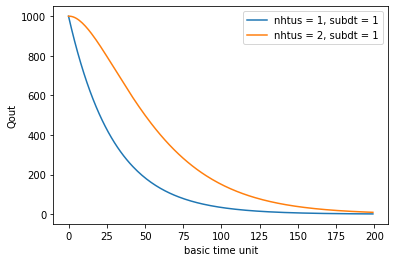

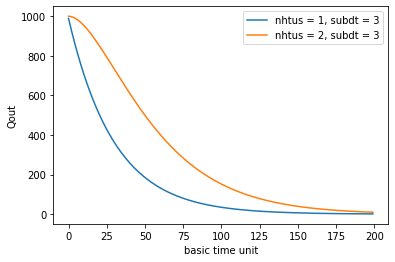

In [4]:
# Experiment 3
"""
Same experiment but with the equilibrium volume for Qin = 1000 and setting Qin = 0.
"""
Lout = []; Lname = []

exp0 = experiment(get_param(), [30000])
Lout.append(exp0.launch()); Lname.append("nhtus = 1, subdt = 1")

exp0 = experiment(get_param(nhtus = 2), [30000, 30000])
Lout.append(exp0.launch()); Lname.append("nhtus = 2, subdt = 1")

exp0 = experiment(get_param(subdt = 3), [90000])
Lout.append(exp0.launch()); Lname.append("nhtus = 1, subdt = 3")

exp0 = experiment(get_param(subdt = 3, nhtus = 2), [90000, 90000])
Lout.append(exp0.launch()); Lname.append("nhtus = 2, subdt = 3")

for i in [0,1]:
  plt.plot(Lout[i][:200], label = Lname[i])
plt.ylabel("Qout")
plt.xlabel("basic time unit")
plt.legend()
plt.show()

for i in [2,3]:
  plt.plot(Lout[i][:200], label = Lname[i])
plt.ylabel("Qout")
plt.xlabel("basic time unit")
plt.legend()
plt.show()



<h3>Conclusion</h3>
Once again we see that in this case the time step doesn't seem to have an influence but the nhtus slow the change of state.



<h1> Further investigations </h1>
<hr>
The aim of this section is to evaluate if there can be limit for the dt description. It contains two type of experiments :  

* Experiment with the same dt and different nhtus
* Experiment with different dt and same nhtus

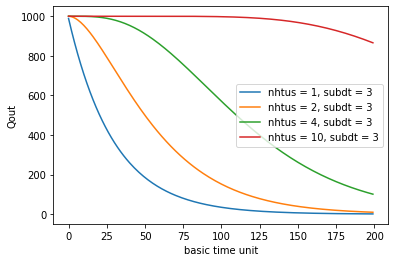

In [5]:
# Experiment 4
"""
We take subdt = 3. The volume are set at equelibrium for a Qin = 1000.
The simulation have Qin = 0 -> let see how the htus will empty
"""

Lout = []; Lname = []

exp0 = experiment(get_param(subdt = 3), [90000])
Lout.append(exp0.launch()); Lname.append("nhtus = 1, subdt = 3")

exp0 = experiment(get_param(subdt = 3,nhtus = 2), [90000, 90000])
Lout.append(exp0.launch()); Lname.append("nhtus = 2, subdt = 3")

exp0 = experiment(get_param(subdt = 3, nhtus = 4), [90000]*4)
Lout.append(exp0.launch()); Lname.append("nhtus = 4, subdt = 3")

exp0 = experiment(get_param(subdt = 3, nhtus = 10), [90000]*10)
Lout.append(exp0.launch()); Lname.append("nhtus = 10, subdt = 3")

for i in range(len(Lout)):
  plt.plot(Lout[i][:200], label = Lname[i])
plt.ylabel("Qout")
plt.xlabel("basic time unit")
plt.legend()
plt.show()


<h3> Conclusion </h3>
The more intermediate HTUs the slower is the change of state.

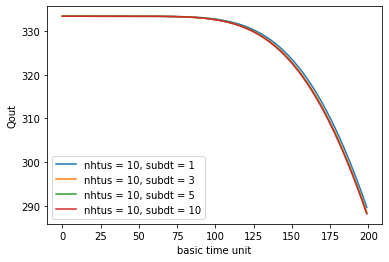

In [6]:
# Experiment 5
"""
We take the extreme case from last experiment (nhtus = 10)
and we test different subdt. The volume are all adjusted so they correspond to Qin = 1000
in the different subdt cases.
"""
Lout = []; Lname = []

exp0 = experiment(get_param(subdt = 1, nhtus = 10), [10000]*10)
Lout.append(exp0.launch()); Lname.append("nhtus = 10, subdt = 1")

exp0 = experiment(get_param(subdt = 3,nhtus = 10), [30000]*10)
Lout.append(exp0.launch()); Lname.append("nhtus = 10, subdt = 3")

exp0 = experiment(get_param(subdt = 5, nhtus = 10), [50000]*10)
Lout.append(exp0.launch()); Lname.append("nhtus = 10, subdt = 5")

exp0 = experiment(get_param(subdt = 10, nhtus = 10), [100000]*10)
Lout.append(exp0.launch()); Lname.append("nhtus = 10, subdt = 10")

for i in range(len(Lout)):
  plt.plot(Lout[i][:200], label = Lname[i])
plt.ylabel("Qout")
plt.xlabel("basic time unit")
plt.legend()
plt.show()

<h3> Conclusion </h3>
There is no visible changes, we need to try with larger volumes to see the limits !

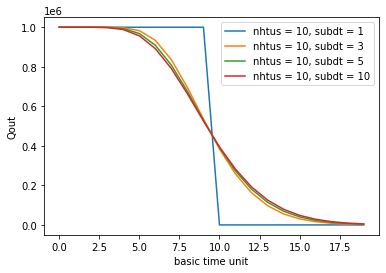

In [7]:
# Experiment 5
"""
In this case we considere an initial volume of 1000000 for the case with subdt = 1 
and we adjust the volume fot the other subdt so it corresponds to the same discharge.
topoindex is also set at 10 (more slope) so the impact is more visible.
"""
Lout = []; Lname = []
V0 = 1000000
topoindex = 10

exp0 = experiment(get_param(subdt = 1, nhtus = 10, topoindex = topoindex), [V0]*10)
Lout.append(exp0.launch()); Lname.append("nhtus = 10, subdt = 1")

exp0 = experiment(get_param(subdt = 3,nhtus = 10, topoindex = topoindex), [V0*3]*10)
Lout.append(exp0.launch()); Lname.append("nhtus = 10, subdt = 3")

exp0 = experiment(get_param(subdt = 5, nhtus = 10, topoindex = topoindex), [V0*5]*10)
Lout.append(exp0.launch()); Lname.append("nhtus = 10, subdt = 5")

exp0 = experiment(get_param(subdt = 10, nhtus = 10, topoindex = topoindex), [V0*10]*10)
Lout.append(exp0.launch()); Lname.append("nhtus = 10, subdt = 10")

for i in range(len(Lout)):
  plt.plot(Lout[i][:20], label = Lname[i])
plt.ylabel("Qout")
plt.xlabel("basic time unit")
plt.legend()
plt.show()


<h3> Conclusion </h3>
We see that subdt = 1 seems to have reach some numerical limit, its curves is not like the other and doesn't correspond to any physical situation.

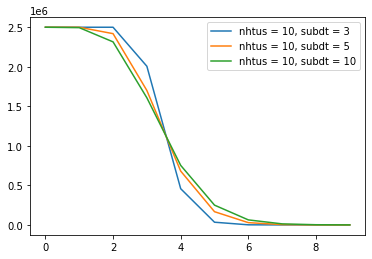

In [8]:
# Experiment 6
"""
In this experiment we no longer consider the case with subdt = 1
We try with a more extreme situation setting topoindex = 4
"""
Lout = []; Lname = []
V0 = 1000000
topoindex = 4

exp0 = experiment(get_param(subdt = 3,nhtus = 10, topoindex = topoindex), [V0*3]*10)
Lout.append(exp0.launch()); Lname.append("nhtus = 10, subdt = 3")

exp0 = experiment(get_param(subdt = 5, nhtus = 10, topoindex = topoindex), [V0*5]*10)
Lout.append(exp0.launch()); Lname.append("nhtus = 10, subdt = 5")

exp0 = experiment(get_param(subdt = 10, nhtus = 10, topoindex = topoindex), [V0*10]*10)
Lout.append(exp0.launch()); Lname.append("nhtus = 10, subdt = 10")

for i in range(len(Lout)):
  plt.plot(Lout[i][:10], label = Lname[i])
plt.legend()
plt.show()

<h3> Conclusion </h3>
In this case the curves for subdt = 5 and subdt = 10 are still similar but subdt = 3 starts to have a different behaviour that seems to be related to numerical issues.